## Preprocessing

### Importing Libraries & Preparing Data

In [91]:
import os
import operator

import networkx as nx
# !pip install cdlib
import cdlib
from cdlib import algorithms, viz, evaluation

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

     |████████████████████████████████| 228 kB 27.6 MB/s eta 0:00:01
     |████████████████████████████████| 204 kB 74.6 MB/s eta 0:00:01
  Using cached markov_clustering-0.0.6.dev0-py3-none-any.whl (6.3 kB)
  Using cached PuLP-2.6.0-py3-none-any.whl (14.2 MB)
  Using cached eva_lcd-0.1.1-py3-none-any.whl (9.2 kB)
Processing /home/jovyan/.cache/pip/wheels/d7/0c/76/042b46eb0df65c3ccd0338f791210c55ab79d209bcc269e2c7/python_Levenshtein-0.12.2-cp38-cp38-linux_x86_64.whl
  Using cached demon-2.0.6-py3-none-any.whl (7.3 kB)
  Using cached dynetx-0.3.1-py3-none-any.whl (39 kB)
     |████████████████████████████████| 1.9 MB 66.9 MB/s eta 0:00:01
  Using cached thresholdclustering-1.1-py3-none-any.whl (5.3 kB)
  Using cached bimlpa-0.1.2-py3-none-any.whl (7.0 kB)
  Using cached nf1-0.0.4-py3-none-any.whl (18 kB)
Processing /home/jovyan/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4/pyclustering-0.10.1.2-py3-none-any.whl
  Using cached angel_cd-1.0.3-py3-none-any.w

In [112]:
data = pd.read_csv('got-s1-edges.csv')

In [113]:
data.drop(labels='Season', axis=1, inplace=True)

In [114]:
data['Source'] = data['Source'].str.replace('_', ' ').str.title()
data['Target'] = data['Target'].str.replace('_', ' ').str.title()

In [115]:
data.isna().sum()

Source    0
Target    0
Weight    0
dtype: int64

In [116]:
data.head()

Source  Target  Weight
0           Ned  Robert     192
1      Daenerys   Jorah     154
2           Jon     Sam     121
3  Littlefinger     Ned     107
4           Ned   Varys      96

## Network Statistics

### Defining Network

In [117]:
nodes = list(set(data['Source'].to_list() + data['Target'].to_list()))

In [118]:
len(nodes)

126

In [119]:
edges = data[['Source', 'Target']].drop_duplicates()

In [120]:
G = nx.from_pandas_edgelist(data, "Source", "Target", create_using=nx.DiGraph(), edge_attr="Weight")

In [121]:
for character in nodes:
    print('{} : In-degree = {}, Out-Degree = {}'.format(character, G.in_degree[character], G.out_degree[character]))

Septa Mordane : In-degree = 6, Out-Degree = 0
Tysha : In-degree = 2, Out-Degree = 0
Jory Cassel : In-degree = 3, Out-Degree = 5
Brandon Stark : In-degree = 1, Out-Degree = 4
Mycah : In-degree = 2, Out-Degree = 2
Sansa : In-degree = 22, Out-Degree = 4
Dareon : In-degree = 2, Out-Degree = 8
Joyeuse : In-degree = 0, Out-Degree = 1
Kevan : In-degree = 3, Out-Degree = 4
Doreah : In-degree = 1, Out-Degree = 7
Jaime : In-degree = 8, Out-Degree = 16
Rhaego : In-degree = 3, Out-Degree = 1
Grenn : In-degree = 2, Out-Degree = 6
Syrio Forel : In-degree = 3, Out-Degree = 0
Mago : In-degree = 2, Out-Degree = 0
Varly : In-degree = 1, Out-Degree = 0
Mace : In-degree = 1, Out-Degree = 0
Leo Lefford : In-degree = 2, Out-Degree = 1
Tywin : In-degree = 17, Out-Degree = 0
Masha Heddle : In-degree = 1, Out-Degree = 1
Aegon : In-degree = 0, Out-Degree = 2
Maester Aemon : In-degree = 6, Out-Degree = 3
Bran : In-degree = 2, Out-Degree = 18
Irri : In-degree = 3, Out-Degree = 4
Shagga : In-degree = 2, Out-Degree

In [122]:
len(G.nodes)

126

In [123]:
len(G.edges)

549

### Basic Metrics

In [124]:
pd.DataFrame(G.in_degree, columns=['Character', 'In-degree']).sort_values(by='In-degree', ascending=False).head()

Character  In-degree
13    Tyrion         37
0        Ned         34
1     Robert         28
17     Sansa         22
11      Robb         21

In [125]:
pd.DataFrame(G.out_degree, columns=['Character', 'Out-degree']).sort_values(by='Out-degree', ascending=False).head()

Character  Out-degree
10   Catelyn          29
9       Arya          28
0        Ned          23
14    Cersei          23
24      Bran          18

In [126]:
len(G.nodes)

126

In [127]:
len(G.edges)

549

In [128]:
df = pd.DataFrame(G.in_degree, columns=['Character', 'In-degree']).sort_values(by='In-degree', ascending=False)
df[df['In-degree'] > 5].tail()

Character  In-degree
3           Jorah          6
47  Maester Aemon          6
65    Meryn Trant          6
14         Cersei          6
42        Rakharo          6

### Plotting Networks

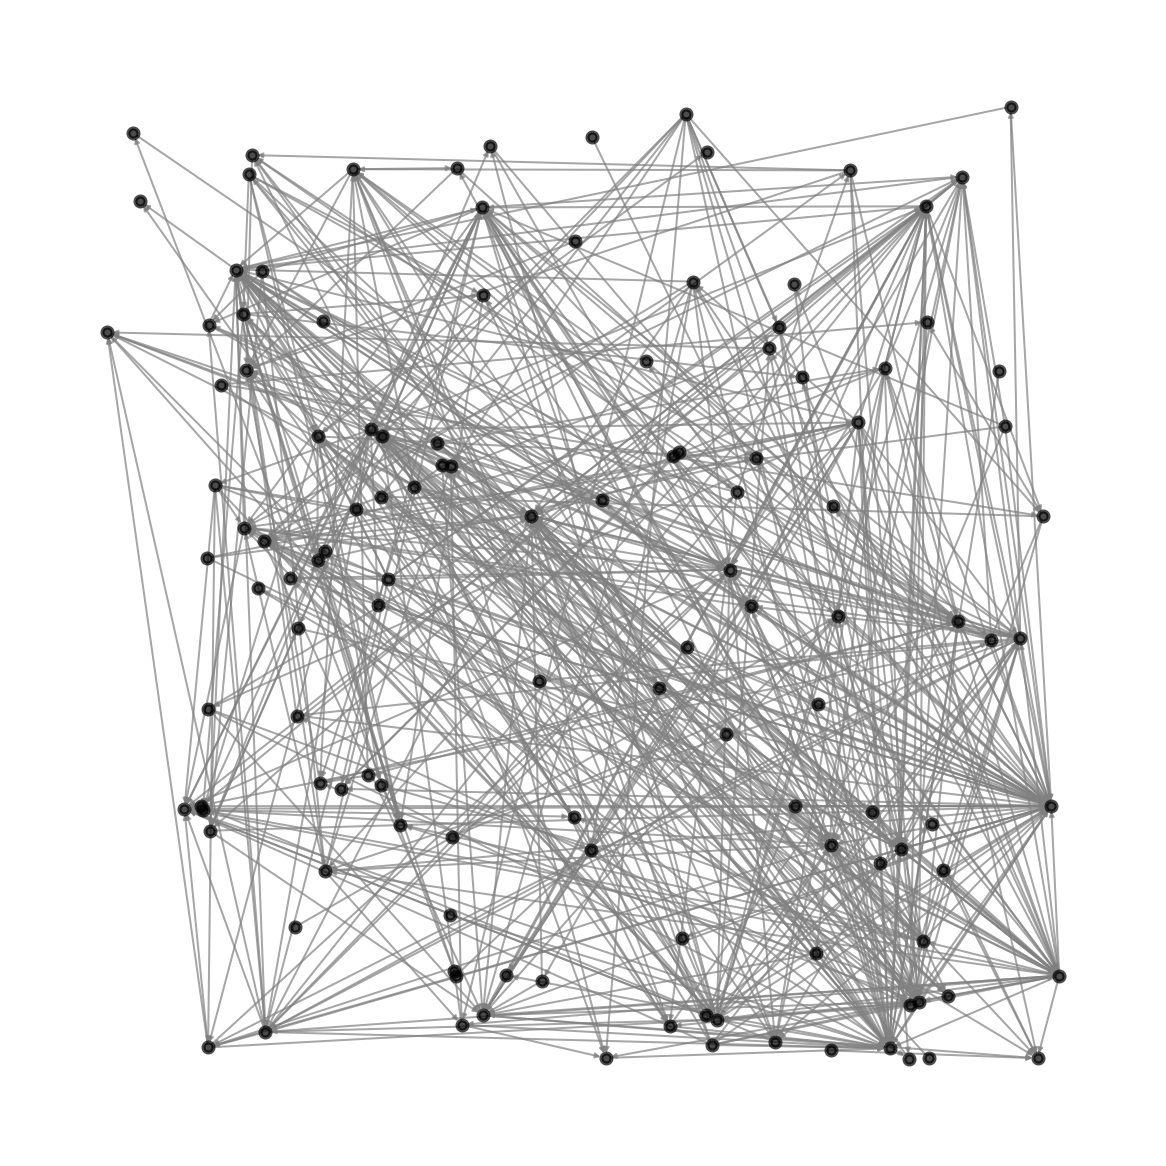

In [129]:
figure(figsize=(16, 16))
nx.draw_random(G, 
        with_labels=False, 
        node_size=1e2, 
        node_color='black', 
        node_shape='o', 
        alpha=0.7, 
        linewidths=4, 
        font_size=16, 
        font_color='black', 
        font_weight='normal', 
        width=2, 
        edge_color='grey')

In [130]:
def interestNodes(dataset, character):
    return list(dataset[dataset.Target == character].Source.head(20)) + [character]

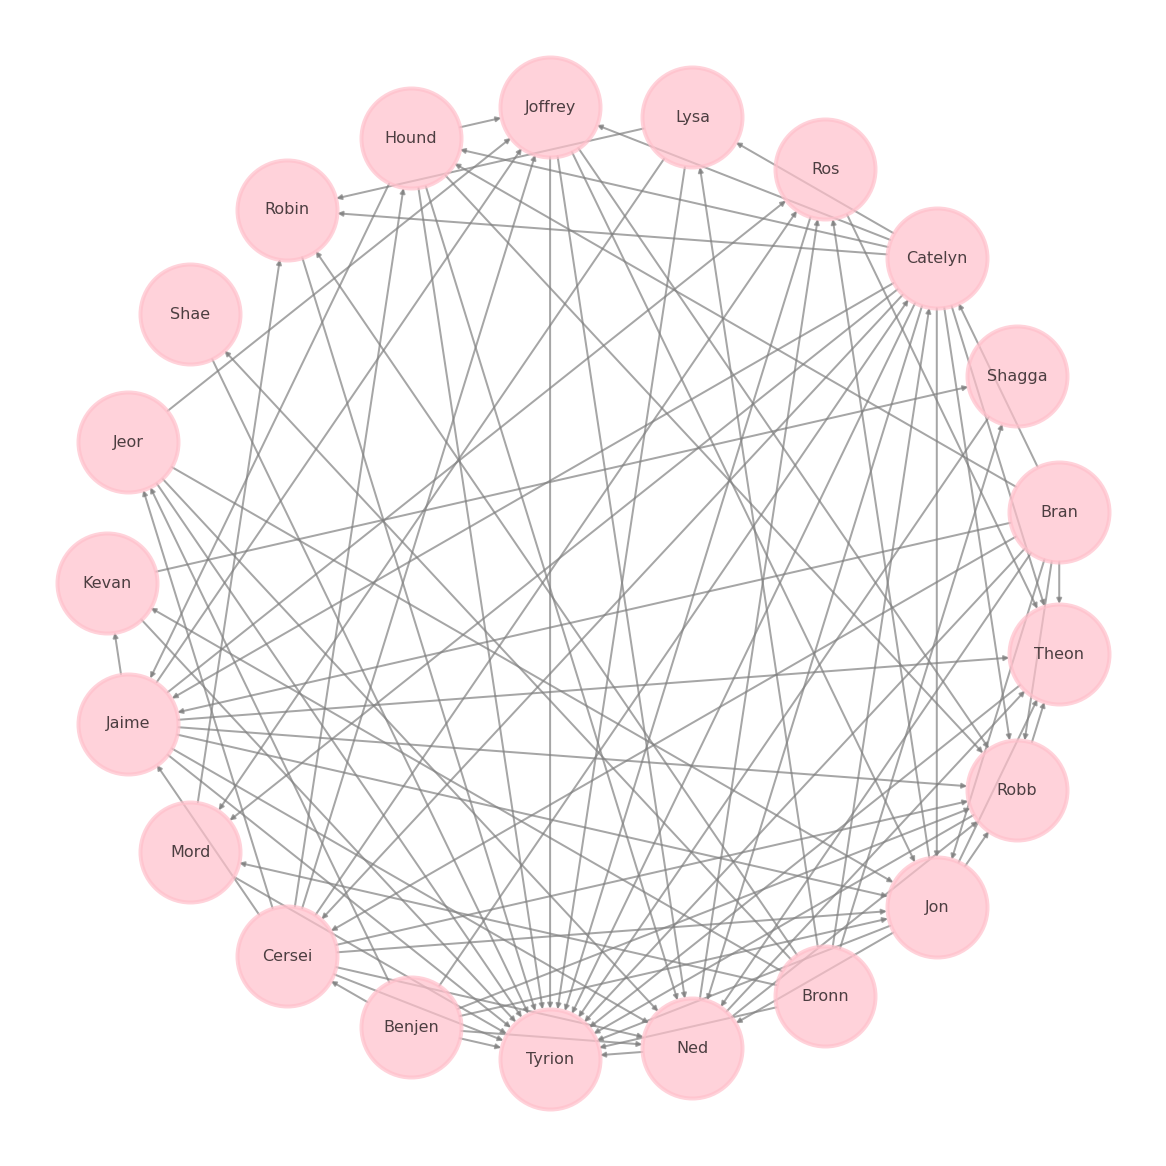

In [131]:
figure(figsize=(16, 16))
nx.draw_shell(G.subgraph(nodes=interestNodes(data, 'Tyrion')), 
        with_labels=True, 
        node_size=1e4, 
        node_color='pink', 
        node_shape='o', 
        alpha=0.7, 
        linewidths=4, 
        font_size=16, 
        font_color='black', 
        font_weight='normal', 
        width=2, 
        edge_color='grey')

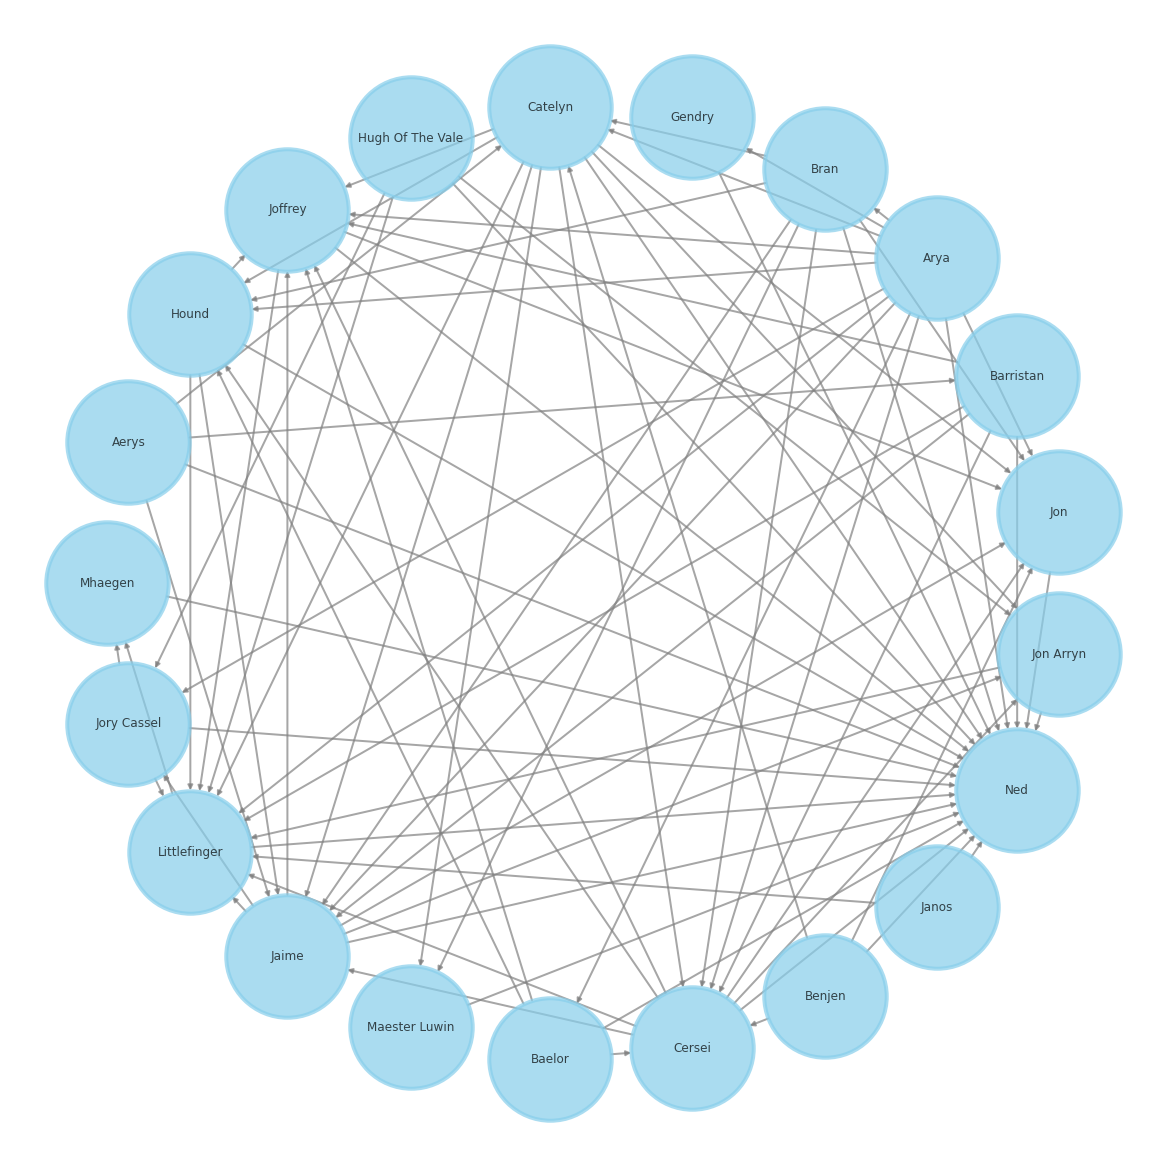

In [132]:
figure(figsize=(16, 16))
nx.draw_shell(G.subgraph(nodes=interestNodes(data, 'Ned')), 
        with_labels=True, 
        node_size=1.5e4, 
        node_color='skyblue', 
        node_shape='o', 
        alpha=0.7, 
        linewidths=4, 
        font_size=12, 
        font_color='black', 
        font_weight='normal', 
        width=2, 
        edge_color='grey')

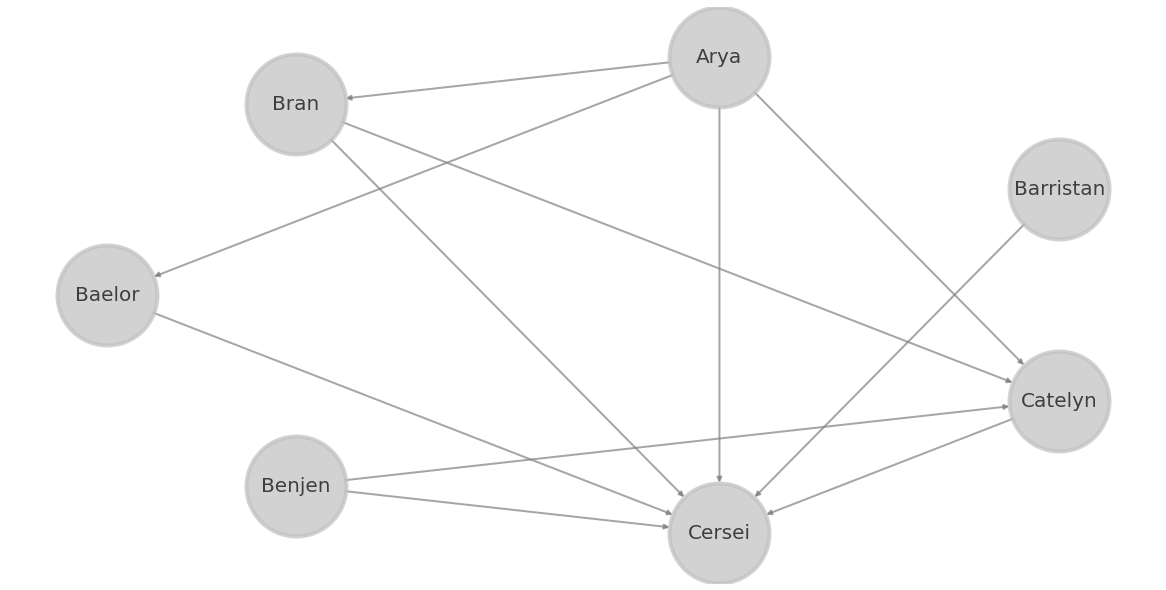

In [133]:
figure(figsize=(16, 8))
nx.draw_shell(G.subgraph(nodes=interestNodes(data, 'Cersei')), 
        with_labels=True, 
        node_size=1e4, 
        node_color='silver', 
        node_shape='o', 
        alpha=0.7, 
        linewidths=4, 
        font_size=20, 
        font_color='black', 
        font_weight='normal', 
        width=2, 
        edge_color='grey')

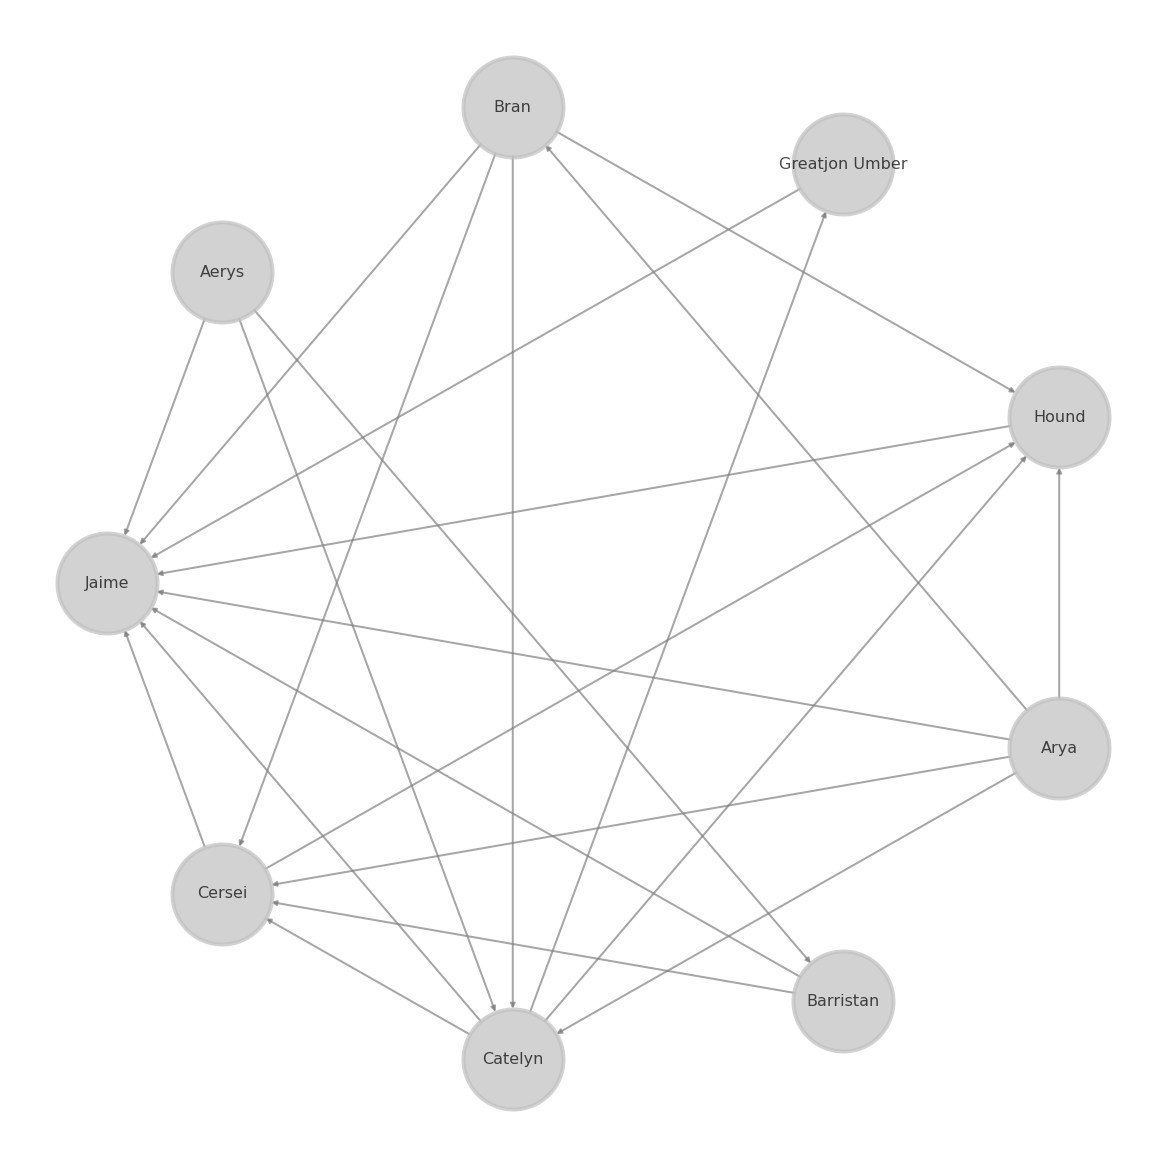

In [134]:
figure(figsize=(16, 16))
nx.draw_shell(G.subgraph(nodes=interestNodes(data, 'Jaime')), 
        with_labels=True, 
        node_size=1e4, 
        node_color='silver', 
        node_shape='o', 
        alpha=0.7, 
        linewidths=4, 
        font_size=16, 
        font_color='black', 
        font_weight='normal', 
        width=2, 
        edge_color='grey')

### Neighbors, Precessors & Successors

In [135]:
print(list(G.neighbors(n='Tyrion')))

['Tywin', 'Yoren', 'Tysha', 'Varys']


In [136]:
print(list(G.successors(n='Tyrion')))

['Tywin', 'Yoren', 'Tysha', 'Varys']


In [137]:
len(list(G.successors(n='Tyrion')))

4

In [138]:
len(list(G.predecessors(n='Tyrion')))

37

### Paths

In [139]:
list(nx.simple_paths.all_simple_paths(G, source='Ned', target='Tyrion'))[:20]

[['Ned', 'Robert', 'Tyrion'],
 ['Ned', 'Robert', 'Ros', 'Theon', 'Tyrion'],
 ['Ned', 'Robert', 'Ros', 'Tyrion'],
 ['Ned', 'Pycelle', 'Robert', 'Tyrion'],
 ['Ned', 'Pycelle', 'Robert', 'Ros', 'Theon', 'Tyrion'],
 ['Ned', 'Pycelle', 'Robert', 'Ros', 'Tyrion'],
 ['Ned', 'Pycelle', 'Ros', 'Theon', 'Tyrion'],
 ['Ned', 'Pycelle', 'Ros', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robert', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robert', 'Ros', 'Theon', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robert', 'Ros', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robb', 'Theon', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robb', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robb', 'Rodrik', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robb', 'Rodrik', 'Theon', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robb', 'Robert', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robb', 'Robert', 'Ros', 'Theon', 'Tyrion'],
 ['Ned', 'Pycelle', 'Renly', 'Robb', 'Robert', 'Ros', 'Tyrion'],
 ['Ned', 'Renly', 'Robert', 'Tyrion'],
 ['Ned', 'Renly',

In [140]:
list(nx.shortest_path(G, source='Ned', target='Tyrion'))

['Ned', 'Tyrion']

In [141]:
len(G.nodes)

126

In [142]:
len(G.edges)

549

In [143]:
nx.shortest_path_length(G, source='Ned', target='Tyrion')

1

In [144]:
list(nx.shortest_path(G, source='Ned', target='Robert'))

['Ned', 'Robert']

In [145]:
list(nx.shortest_path(G, source='Ned', target='Sansa'))

['Ned', 'Sansa']

In [146]:
list(nx.shortest_path(G, source='Ned', target='Robb'))

['Ned', 'Robb']

### Saving Subgraphs

In [147]:
G_Tyrion = G.subgraph(nodes=interestNodes(data, 'Tyrion'))
nx.write_gexf(G_Tyrion, 'Tyrion_Network.gexf')

In [148]:
G_Ned = G.subgraph(nodes=interestNodes(data, 'Ned'))
nx.write_gexf(G_Ned, 'Ned_Network.gexf')

### Node Importance

#### Degree Centrality

Node importance based on number of connections, higher the more

In [149]:
result_a = nx.degree_centrality(G) # Entire S1
sort = sorted(result_a.items(), key=lambda kv: kv[1],reverse=True)

In [150]:
sort[0:5]

[('Ned', 0.456),
 ('Tyrion', 0.328),
 ('Robert', 0.28800000000000003),
 ('Catelyn', 0.28800000000000003),
 ('Robb', 0.24)]

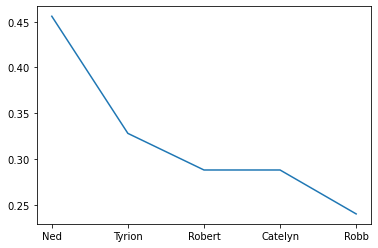

In [151]:
plt.plot(*zip(*sort[:5]))
plt.show()

In [152]:
result = nx.degree_centrality(G_Tyrion) # Tyrion's
sort = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [153]:
sort[0:5]

[('Tyrion', 1.0),
 ('Catelyn', 0.75),
 ('Ned', 0.65),
 ('Jaime', 0.6000000000000001),
 ('Cersei', 0.6000000000000001)]

In [154]:
result = nx.degree_centrality(G_Ned) # Ned's
sort = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [155]:
sort[0:5]

[('Ned', 1.0),
 ('Littlefinger', 0.65),
 ('Jaime', 0.65),
 ('Cersei', 0.65),
 ('Catelyn', 0.65)]

#### Betweenness Centrality

Importance of nodes based on how often they lie between the shortest paths among other nodes

In [156]:
result_b = nx.betweenness_centrality(G) # Entire S1
sort = sorted(result_b.items(), key=lambda kv: kv[1],reverse=True)

In [157]:
sort[0:5]

[('Ned', 0.05032963094253417),
 ('Catelyn', 0.020911751152073735),
 ('Robert', 0.011939666784828076),
 ('Jon', 0.010778455236519754),
 ('Tyrion', 0.01046876993973768)]

In [158]:
result = nx.betweenness_centrality(G_Tyrion) # Tyrion's
sort = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [159]:
sort[0:5]

[('Catelyn', 0.049561403508771924),
 ('Jaime', 0.03298245614035088),
 ('Cersei', 0.017543859649122806),
 ('Kevan', 0.015789473684210527),
 ('Ned', 0.011929824561403506)]

In [160]:
result = nx.betweenness_centrality(G_Ned) # Ned's
sort = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [161]:
sort[0:5]

[('Jaime', 0.03701754385964912),
 ('Littlefinger', 0.031710526315789474),
 ('Catelyn', 0.02837719298245614),
 ('Cersei', 0.025964912280701757),
 ('Hound', 0.0062280701754385956)]

#### Closeness Centrality

Node importance based on how close the node is located to the actions

In [162]:
result_c = nx.closeness_centrality(G) # Entire S1
sort = sorted(result_c.items(), key=lambda kv: kv[1],reverse=True)

In [163]:
sort[0:5]

[('Tyrion', 0.41813333333333336),
 ('Varys', 0.36299386503067477),
 ('Tywin', 0.3481927710843374),
 ('Yoren', 0.3364),
 ('Robert', 0.30068686868686867)]

In [164]:
result = nx.closeness_centrality(G_Tyrion) # Tyrion's
sort = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [165]:
sort[0:5]

[('Tyrion', 1.0),
 ('Robb', 0.4653846153846154),
 ('Ned', 0.45454545454545453),
 ('Theon', 0.4447368421052632),
 ('Jon', 0.3681818181818182)]

In [166]:
result = nx.closeness_centrality(G_Ned) # Ned's
sort = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

#### PageRank

Importance of nodes based on the quality of those nodes that are connected to it

In [167]:
result_d = nx.pagerank(G) # Entire S1
sort = sorted(result_d.items(), key=lambda kv: kv[1],reverse=True)

In [168]:
sort[0:5]

[('Tyrion', 0.07061356933584698),
 ('Yoren', 0.059434613835625406),
 ('Varys', 0.03625353588888159),
 ('Tywin', 0.0350771241609703),
 ('Ned', 0.028745677171241147)]

In [169]:
result = nx.pagerank(G_Tyrion) # Tyrion's
sort = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [170]:
sort[0:5]

[('Tyrion', 0.3036421932604717),
 ('Theon', 0.09087201841526801),
 ('Robb', 0.06235734359770076),
 ('Ned', 0.05566960902202011),
 ('Ros', 0.04429425406271154)]

In [171]:
result = nx.pagerank(G_Ned) # Ned's
sort = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [172]:
sort[0:5]

[('Ned', 0.29957403077940414),
 ('Littlefinger', 0.09774666565121182),
 ('Mhaegen', 0.06967659046931017),
 ('Jon', 0.05578920024643838),
 ('Joffrey', 0.05066313040139242)]

In [173]:
sort[0:5]

[('Ned', 0.29957403077940414),
 ('Littlefinger', 0.09774666565121182),
 ('Mhaegen', 0.06967659046931017),
 ('Jon', 0.05578920024643838),
 ('Joffrey', 0.05066313040139242)]

### Inspecting Correlation

In [174]:
import numpy as np

In [175]:
df = pd.DataFrame(index=list(G.nodes))
for results in [result_a, result_b, result_c, result_d]:
    result_df = pd.DataFrame(pd.DataFrame(results, index=np.arange(len(results))).T[0])
    df = pd.concat([df, result_df], axis=1)

In [176]:
metrics = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'PageRank']

In [177]:
df.columns = metrics

In [178]:
df.sort_values(by=[metrics[0]], ascending=False).head()

Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Ned                  0.456                0.050330              0.289855   
Tyrion               0.328                0.010469              0.418133   
Robert               0.288                0.011940              0.300687   
Catelyn              0.288                0.020912              0.056889   
Robb                 0.240                0.009177              0.257852   

         PageRank  
Ned      0.028746  
Tyrion   0.070614  
Robert   0.023863  
Catelyn  0.006114  
Robb     0.023245

In [179]:
df.sort_values(by=[metrics[1]], ascending=False).head()

Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Ned                  0.456                0.050330              0.289855   
Catelyn              0.288                0.020912              0.056889   
Robert               0.288                0.011940              0.300687   
Jon                  0.208                0.010778              0.125000   
Tyrion               0.328                0.010469              0.418133   

         PageRank  
Ned      0.028746  
Catelyn  0.006114  
Robert   0.023863  
Jon      0.007672  
Tyrion   0.070614

In [180]:
df.sort_values(by=[metrics[2]], ascending=False).head()

Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Tyrion              0.328                0.010469              0.418133   
Varys               0.168                0.000495              0.362994   
Tywin               0.136                0.000000              0.348193   
Yoren               0.128                0.000000              0.336400   
Robert              0.288                0.011940              0.300687   

        PageRank  
Tyrion  0.070614  
Varys   0.036254  
Tywin   0.035077  
Yoren   0.059435  
Robert  0.023863

In [181]:
df.sort_values(by=[metrics[3]], ascending=False).head()

Degree Centrality  Betweenness Centrality  Closeness Centrality  \
Tyrion              0.328                0.010469              0.418133   
Yoren               0.128                0.000000              0.336400   
Varys               0.168                0.000495              0.362994   
Tywin               0.136                0.000000              0.348193   
Ned                 0.456                0.050330              0.289855   

        PageRank  
Tyrion  0.070614  
Yoren   0.059435  
Varys   0.036254  
Tywin   0.035077  
Ned     0.028746

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

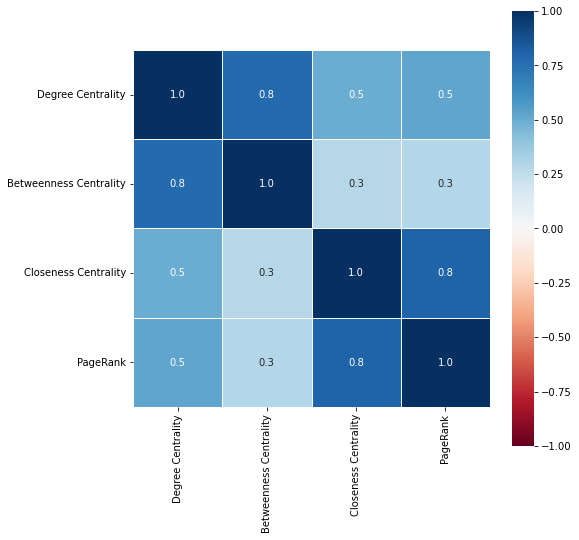

In [183]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt='.1f', vmin=-1, square=True, linewidths=1)
plt.show()

## Community Detection

### Identifying Community Structure

In [184]:
G = nx.from_pandas_edgelist(data, "Source", "Target", create_using=nx.Graph(), edge_attr="Weight")

In [185]:
pos = nx.layout.fruchterman_reingold_layout(G)

#### Community Edge Betweenness or Girvan & Newman Clustering

In [186]:
comm_betweenness = algorithms.girvan_newman(G, level=1)


In [187]:
# Reference: https://charodelgenio.weebly.com/uploads/1/2/2/3/122395752/modden.pdf
for level in range(1,8):
    print('\nLevels:', level)
    comm_betweenness = algorithms.girvan_newman(G, level=level)
    print("Community List: " + str(comm_betweenness.modularity_density()))


Levels: 1
Community List: FitnessResult(min=None, max=None, score=13.902860226659472, std=None)

Levels: 2
Community List: FitnessResult(min=None, max=None, score=17.558184143222505, std=None)

Levels: 3
Community List: FitnessResult(min=None, max=None, score=18.446524064171122, std=None)

Levels: 4
Community List: FitnessResult(min=None, max=None, score=19.071332388377037, std=None)

Levels: 5
Community List: FitnessResult(min=None, max=None, score=18.14641319942611, std=None)

Levels: 6
Community List: FitnessResult(min=None, max=None, score=17.22334785766158, std=None)

Levels: 7
Community List: FitnessResult(min=None, max=None, score=16.30220588235294, std=None)


In [188]:
comm_betweenness = algorithms.girvan_newman(G, level=4)

print("\nCommunity List: " + str(comm_betweenness.communities))
print("\nConductance: " + str(comm_betweenness.conductance()))
print("\nExpansion: " + str(comm_betweenness.expansion()))
print("\nInternal Density: " + str(comm_betweenness.internal_edge_density()))


Community List: [['Septa Mordane', 'Tysha', 'Jory Cassel', 'Brandon Stark', 'Mycah', 'Sansa', 'Kevan', 'Jaime', 'Syrio Forel', 'Varly', 'Mace', 'Leo Lefford', 'Tywin', 'Masha Heddle', 'Bran', 'Shagga', 'Ros', 'Joffrey', 'Osha', 'Stannis', 'Maester Luwin', 'Beric', 'Stable Boy', 'Benjen', 'Robert', 'Loras', 'Jonos Bracken', 'Hot Pie', 'Old Nan', 'Ilyn Payne', 'Tommen', 'Rickon', 'Gendry', 'Catelyn', 'Hodor', 'Shae', 'Mhaegen', 'Littlefinger', 'Meryn Trant', 'Rodrik', 'Baelor', 'Steffon', 'Cersei', 'Joanna', 'Janos', 'Ned', 'Rickard Karstark', 'Tobho Mott', 'Roose Bolton', 'Arya', 'Theon', 'Yoren', 'Lyanna', 'Hugh Of The Vale', 'Renly', 'Balon', 'Varys', 'Myrcella', 'High Septon', 'Assassin', 'Tomard', 'Mord', 'Tyrion', 'Greatjon Umber', 'Lommy Greenhands', 'Bronn', 'Jon Arryn', 'Jon', 'Robb', 'Galbart Glover', 'Addam Marbrand', 'Barristan', 'Rickard Stark', 'Rhaegar', 'Marillion', 'Lancel', 'Mountain', 'Lysa', 'Hound', 'Robin', 'Vardis Egen', 'Aerys', 'Pycelle'], ['Jhiqui', 'Rhaego', '

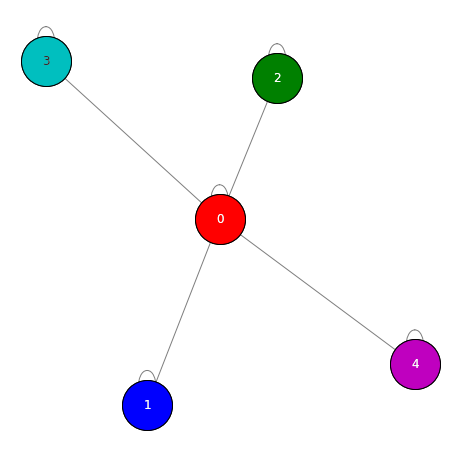

In [189]:
viz.plot_community_graph(G, comm_betweenness, plot_labels=True, node_size=2500)
plt.show()

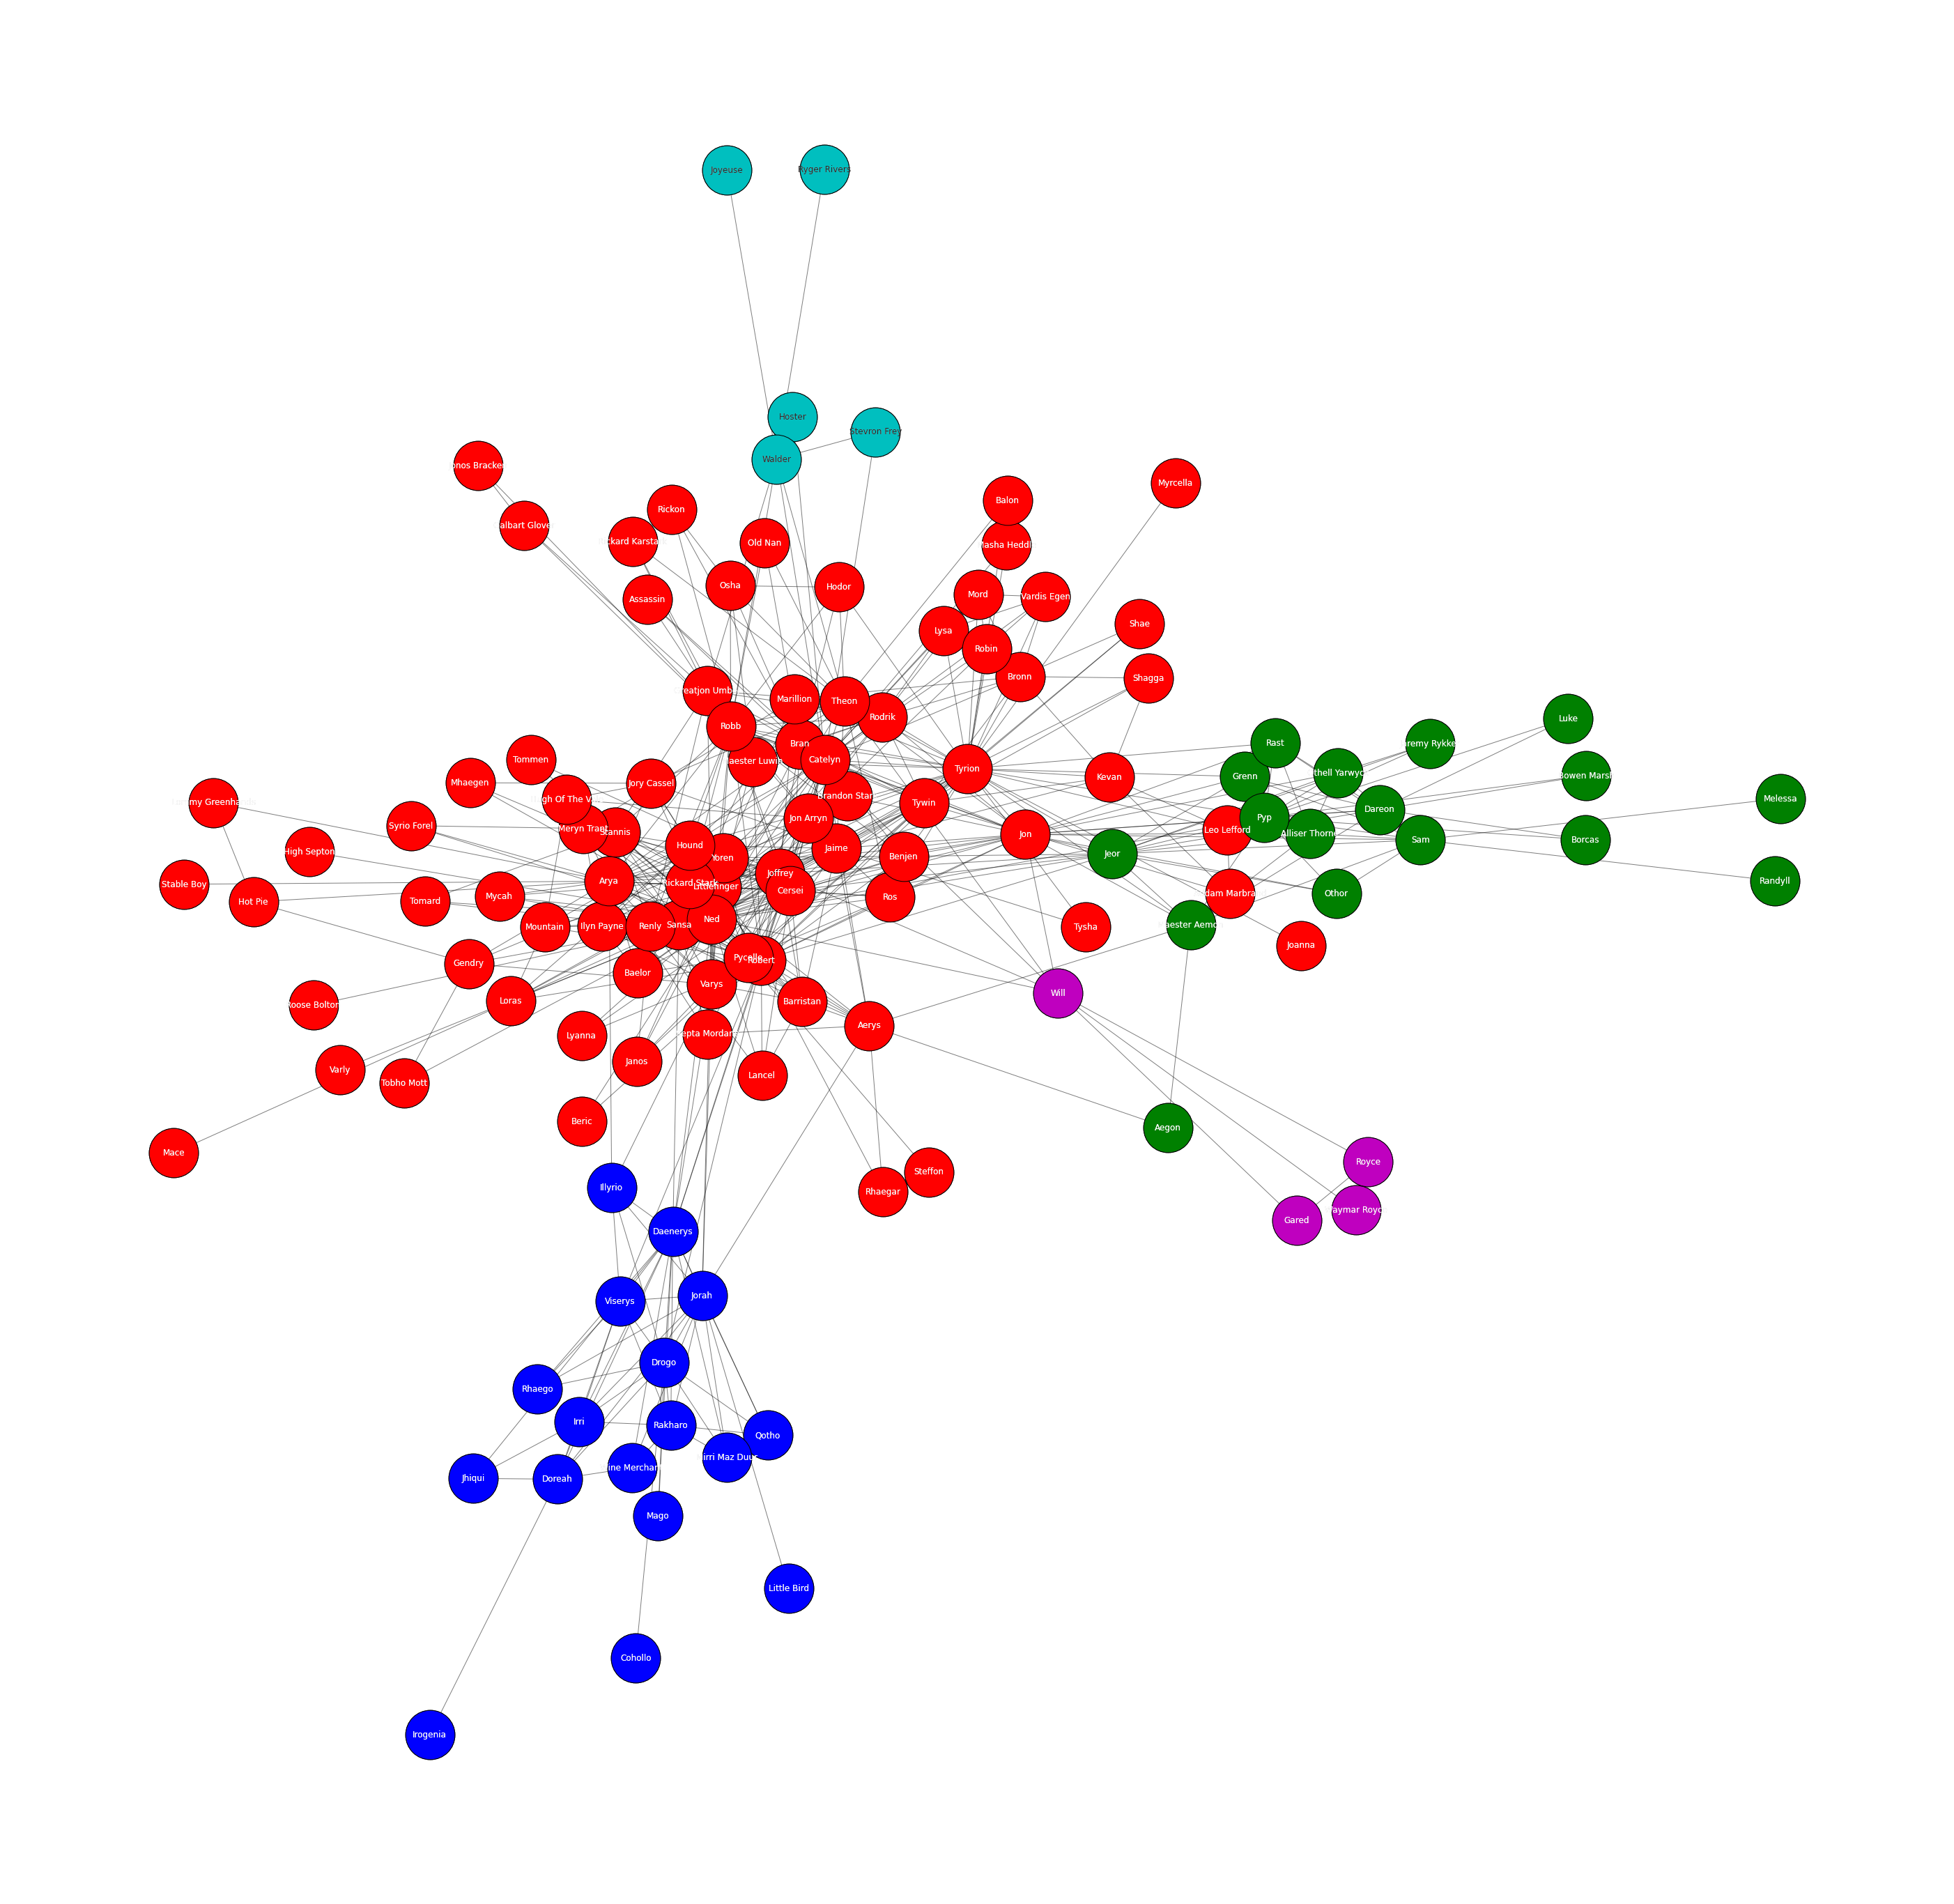

In [190]:
viz.plot_network_clusters(G, comm_betweenness, pos, plot_labels=True, node_size=5e3, figsize=(50,50))
plt.show()

#### Louvain Modularity

In [191]:
"['Ned', 'Robert', 'Littlefinger', 'Varys', 'Arya', 'Cersei', 'Joffrey', 'Sansa', 'Pycelle', 'Septa Mordane', 'Jaime', 'Loras', 'Renly', 'Syrio Forel', 'Jory Cassel', 'Ros', 'Barristan', 'Yoren', 'Hound', 'Lancel', 'Janos', 'Gendry', 'Hot Pie', 'Lommy Greenhands', 'Meryn Trant', 'Jon Arryn', 'Stannis', 'Mycah', 'Tobho Mott', 'Mhaegen', 'Aerys', 'Baelor', 'Stable Boy', 'Hugh Of The Vale', 'Mountain', 'Tomard', 'Rickard Stark', 'Ilyn Payne', 'Lyanna', 'Rhaegar', 'Beric', 'High Septon', 'Tommen', 'Mace', 'Roose Bolton', 'Steffon', 'Varly'], ['Robb', 'Theon', 'Bran', 'Maester Luwin', 'Walder', 'Greatjon Umber', 'Osha', 'Rodrik', 'Rickon', 'Hodor', 'Old Nan', 'Gared', 'Royce', 'Jonos Bracken', 'Will', 'Ryger Rivers', 'Stevron Frey', 'Waymar Royce', 'Assassin', 'Balon', 'Brandon Stark', 'Hoster', 'Galbart Glover', 'Rickard Karstark', 'Joyeuse'], ['Catelyn', 'Bronn', 'Tyrion', 'Shae', 'Tywin', 'Benjen', 'Mord', 'Lysa', 'Robin', 'Shagga', 'Marillion', 'Kevan', 'Vardis Egen', 'Masha Heddle', 'Addam Marbrand', 'Leo Lefford', 'Myrcella', 'Tysha', 'Joanna'], ['Jon', 'Sam', 'Jeor', 'Pyp', 'Grenn', 'Maester Aemon', 'Alliser Thorne', 'Rast', 'Dareon', 'Othell Yarwyck', 'Othor', 'Aegon', 'Borcas', 'Bowen Marsh', 'Luke', 'Jaremy Rykker', 'Melessa', 'Randyll'], ['Daenerys', 'Jorah', 'Drogo', 'Viserys', 'Mirri Maz Duur', 'Doreah', 'Irri', 'Rakharo', 'Qotho', 'Illyrio', 'Wine Merchant', 'Rhaego', 'Mago', 'Cohollo', 'Jhiqui', 'Irogenia', 'Little Bird']".split('[]')

["['Ned', 'Robert', 'Littlefinger', 'Varys', 'Arya', 'Cersei', 'Joffrey', 'Sansa', 'Pycelle', 'Septa Mordane', 'Jaime', 'Loras', 'Renly', 'Syrio Forel', 'Jory Cassel', 'Ros', 'Barristan', 'Yoren', 'Hound', 'Lancel', 'Janos', 'Gendry', 'Hot Pie', 'Lommy Greenhands', 'Meryn Trant', 'Jon Arryn', 'Stannis', 'Mycah', 'Tobho Mott', 'Mhaegen', 'Aerys', 'Baelor', 'Stable Boy', 'Hugh Of The Vale', 'Mountain', 'Tomard', 'Rickard Stark', 'Ilyn Payne', 'Lyanna', 'Rhaegar', 'Beric', 'High Septon', 'Tommen', 'Mace', 'Roose Bolton', 'Steffon', 'Varly'], ['Robb', 'Theon', 'Bran', 'Maester Luwin', 'Walder', 'Greatjon Umber', 'Osha', 'Rodrik', 'Rickon', 'Hodor', 'Old Nan', 'Gared', 'Royce', 'Jonos Bracken', 'Will', 'Ryger Rivers', 'Stevron Frey', 'Waymar Royce', 'Assassin', 'Balon', 'Brandon Stark', 'Hoster', 'Galbart Glover', 'Rickard Karstark', 'Joyeuse'], ['Catelyn', 'Bronn', 'Tyrion', 'Shae', 'Tywin', 'Benjen', 'Mord', 'Lysa', 'Robin', 'Shagga', 'Marillion', 'Kevan', 'Vardis Egen', 'Masha Heddle', '

In [192]:
comm_louvain = algorithms.louvain(G, resolution=1)

print("\nCommunity List: " + str(comm_louvain.communities))
print("\nConductance: " + str(comm_louvain.conductance()))
print("\nExpansion: " + str(comm_louvain.expansion()))
print("\nInternal Density: " + str(comm_louvain.internal_edge_density()))


Community List: [['Ned', 'Robert', 'Littlefinger', 'Varys', 'Arya', 'Cersei', 'Joffrey', 'Sansa', 'Pycelle', 'Septa Mordane', 'Jaime', 'Loras', 'Renly', 'Syrio Forel', 'Jory Cassel', 'Ros', 'Barristan', 'Yoren', 'Hound', 'Lancel', 'Janos', 'Gendry', 'Hot Pie', 'Lommy Greenhands', 'Meryn Trant', 'Jon Arryn', 'Stannis', 'Mycah', 'Tobho Mott', 'Mhaegen', 'Aerys', 'Baelor', 'Stable Boy', 'Hugh Of The Vale', 'Mountain', 'Tomard', 'Rickard Stark', 'Ilyn Payne', 'Lyanna', 'Rhaegar', 'Beric', 'Brandon Stark', 'High Septon', 'Tysha', 'Tommen', 'Mace', 'Roose Bolton', 'Steffon', 'Varly'], ['Robb', 'Theon', 'Bran', 'Maester Luwin', 'Walder', 'Greatjon Umber', 'Osha', 'Rickon', 'Hodor', 'Old Nan', 'Gared', 'Royce', 'Jonos Bracken', 'Will', 'Ryger Rivers', 'Stevron Frey', 'Waymar Royce', 'Assassin', 'Balon', 'Hoster', 'Galbart Glover', 'Rickard Karstark', 'Joyeuse'], ['Jon', 'Sam', 'Jeor', 'Pyp', 'Grenn', 'Benjen', 'Maester Aemon', 'Alliser Thorne', 'Rast', 'Dareon', 'Othell Yarwyck', 'Othor', 'Ae

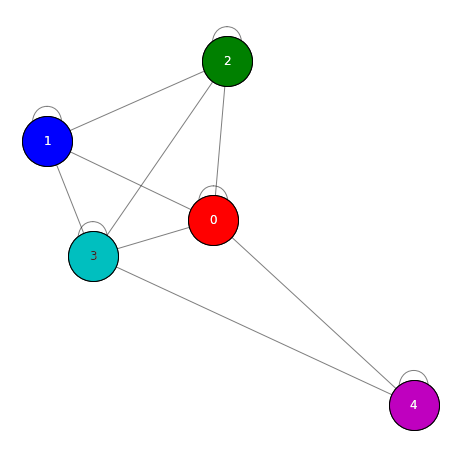

In [193]:
viz.plot_community_graph(G, comm_louvain, plot_labels=True, node_size=2500)
plt.show()

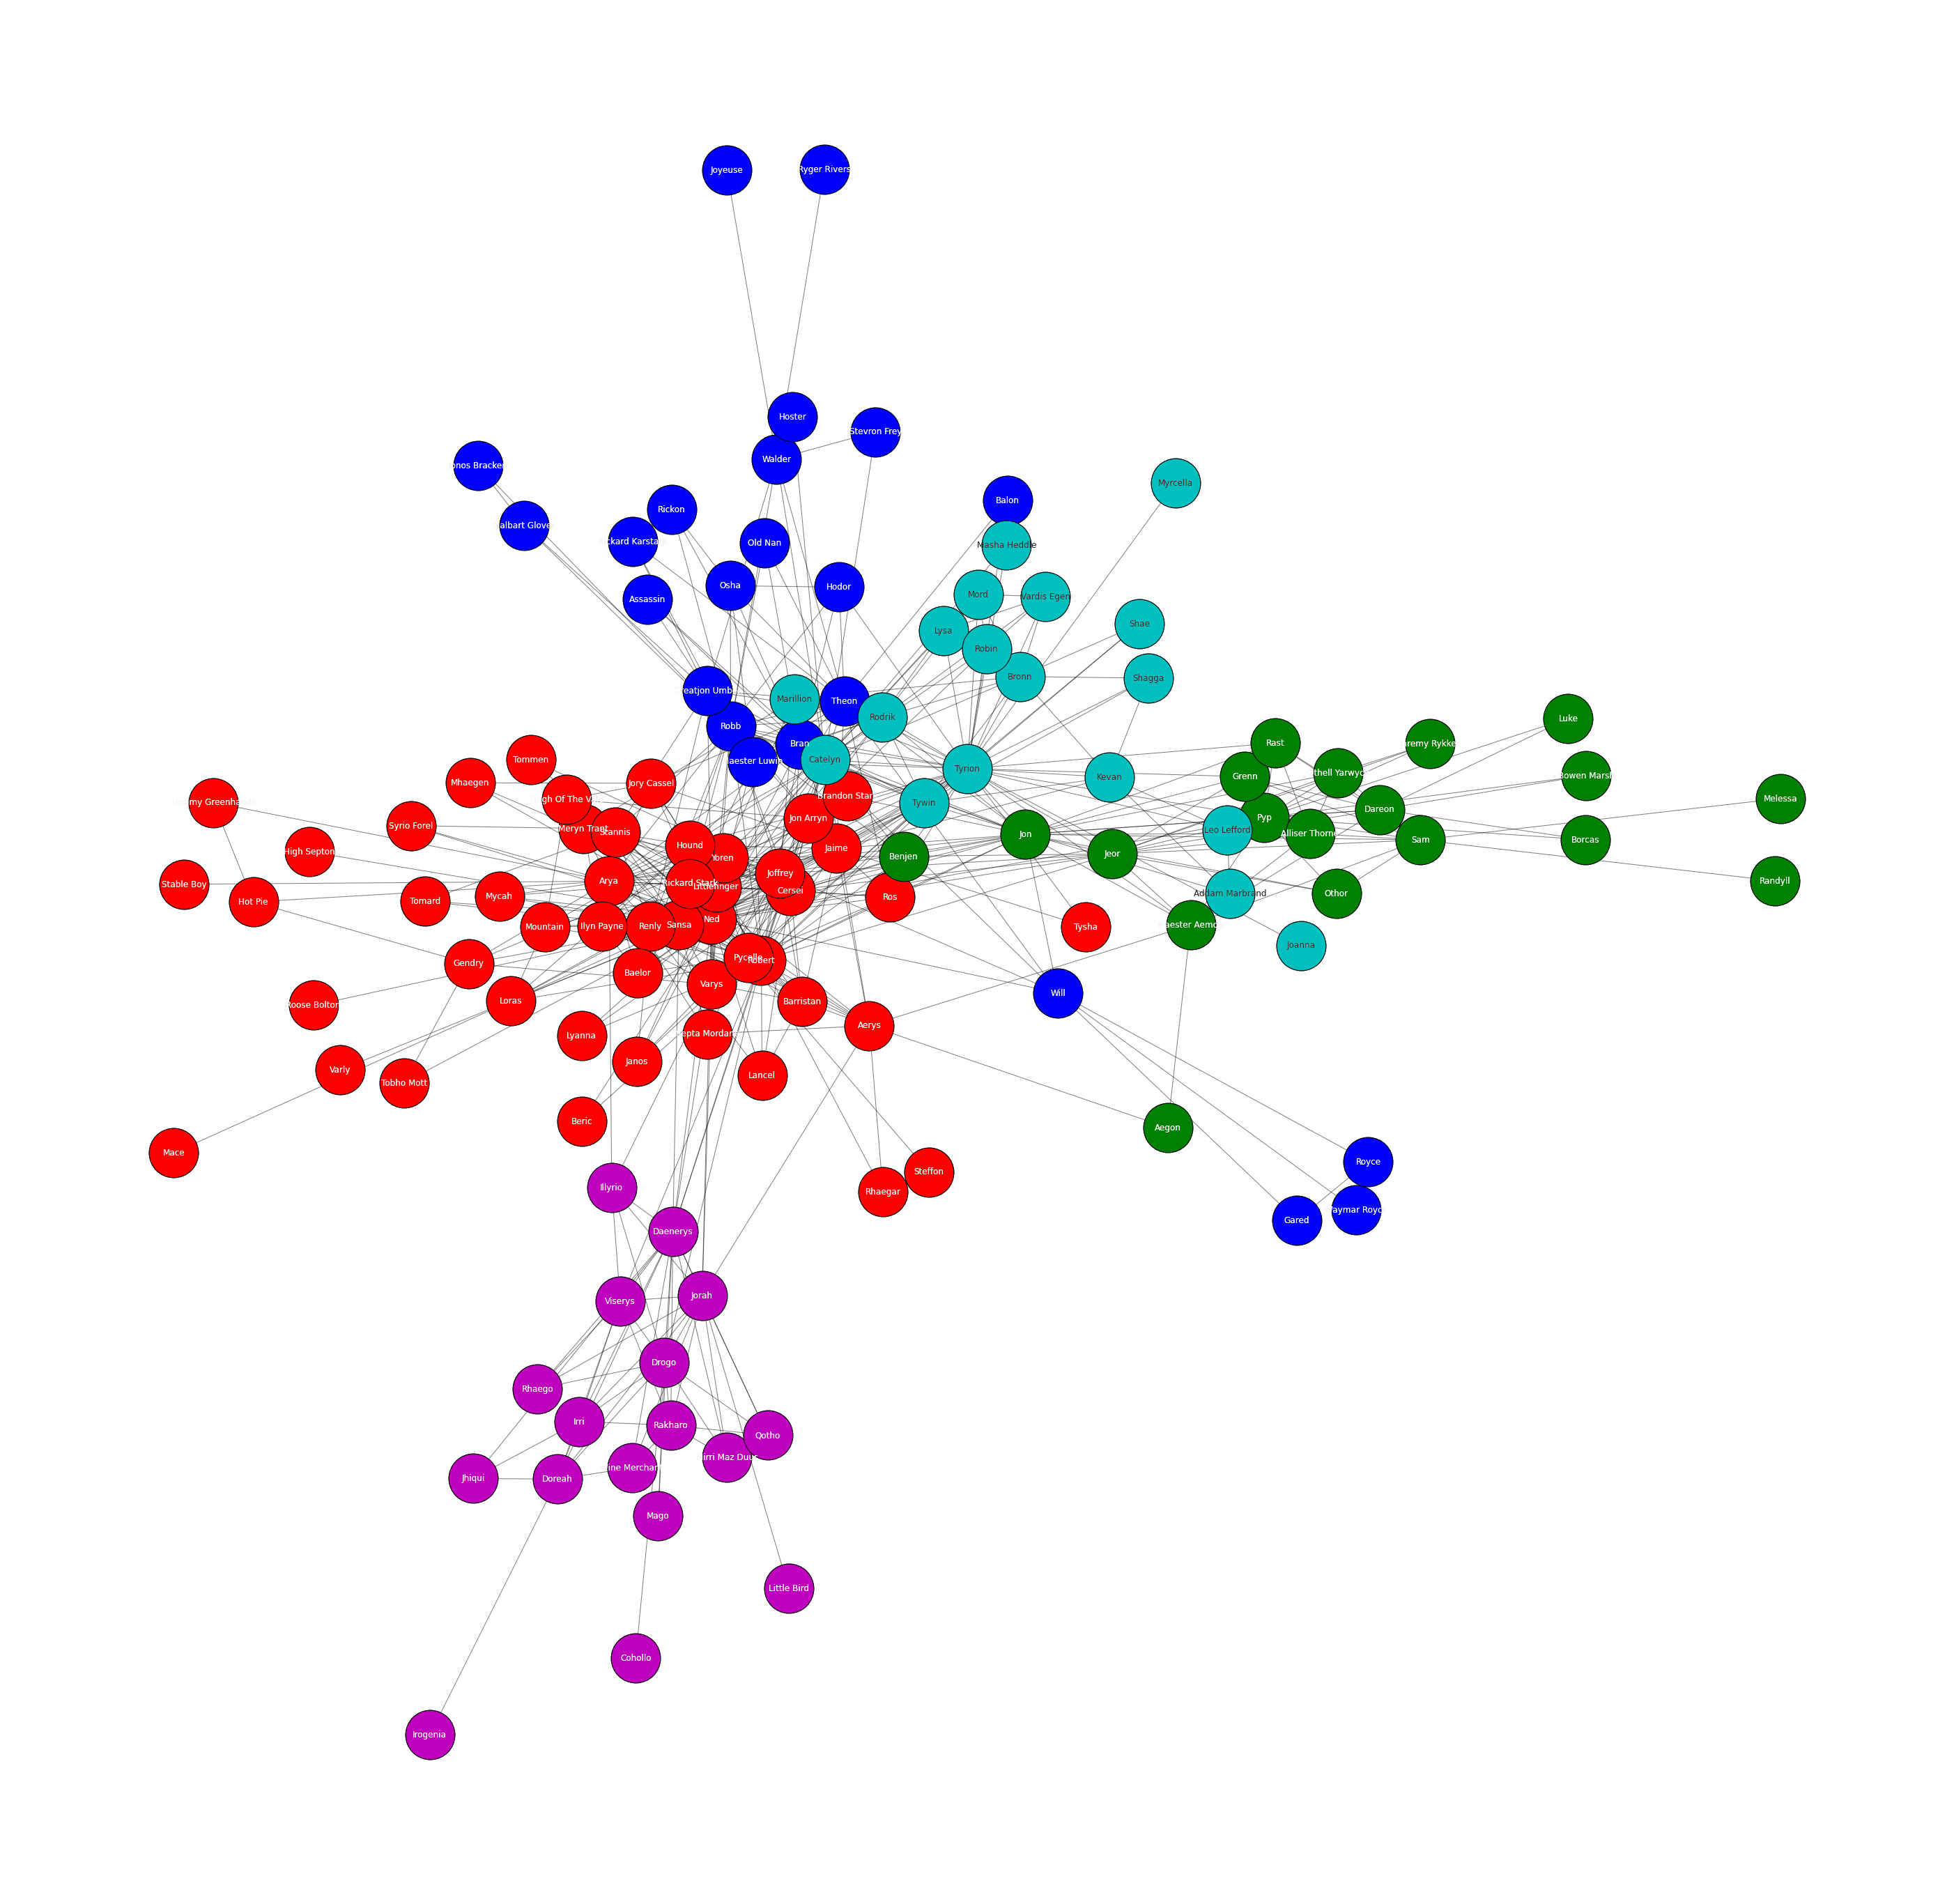

In [194]:
viz.plot_network_clusters(G, comm_louvain, pos, plot_labels=True, node_size=5e3, figsize=(50,50))
plt.show()

#### Infomap

In [195]:
comm_infomap = algorithms.louvain(G)

print("\nCommunity List: " + str(comm_infomap.communities))
print("\nConductance: " + str(comm_infomap.conductance()))
print("\nExpansion: " + str(comm_infomap.expansion()))
print("\nInternal Density: " + str(comm_infomap.internal_edge_density()))


Community List: [['Ned', 'Robert', 'Littlefinger', 'Varys', 'Arya', 'Cersei', 'Joffrey', 'Sansa', 'Pycelle', 'Septa Mordane', 'Loras', 'Renly', 'Syrio Forel', 'Jory Cassel', 'Ros', 'Barristan', 'Yoren', 'Hound', 'Lancel', 'Janos', 'Gendry', 'Hot Pie', 'Lommy Greenhands', 'Meryn Trant', 'Jon Arryn', 'Stannis', 'Mycah', 'Tobho Mott', 'Mhaegen', 'Baelor', 'Stable Boy', 'Hugh Of The Vale', 'Mountain', 'Tomard', 'Ilyn Payne', 'Lyanna', 'Beric', 'High Septon', 'Tommen', 'Mace', 'Roose Bolton', 'Steffon', 'Varly'], ['Robb', 'Theon', 'Bran', 'Maester Luwin', 'Walder', 'Greatjon Umber', 'Osha', 'Rodrik', 'Rickon', 'Hodor', 'Old Nan', 'Gared', 'Royce', 'Jonos Bracken', 'Will', 'Ryger Rivers', 'Stevron Frey', 'Waymar Royce', 'Assassin', 'Hoster', 'Galbart Glover', 'Rickard Karstark', 'Joyeuse'], ['Catelyn', 'Bronn', 'Tyrion', 'Shae', 'Tywin', 'Jaime', 'Mord', 'Lysa', 'Robin', 'Shagga', 'Marillion', 'Kevan', 'Vardis Egen', 'Masha Heddle', 'Addam Marbrand', 'Leo Lefford', 'Balon', 'Myrcella', 'Tys

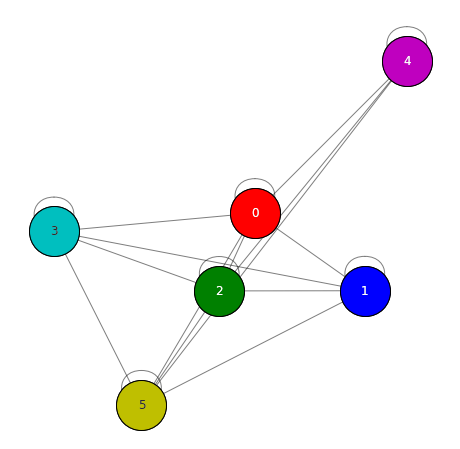

In [196]:
viz.plot_community_graph(G, comm_infomap, plot_labels=True, node_size=2500)
plt.show()

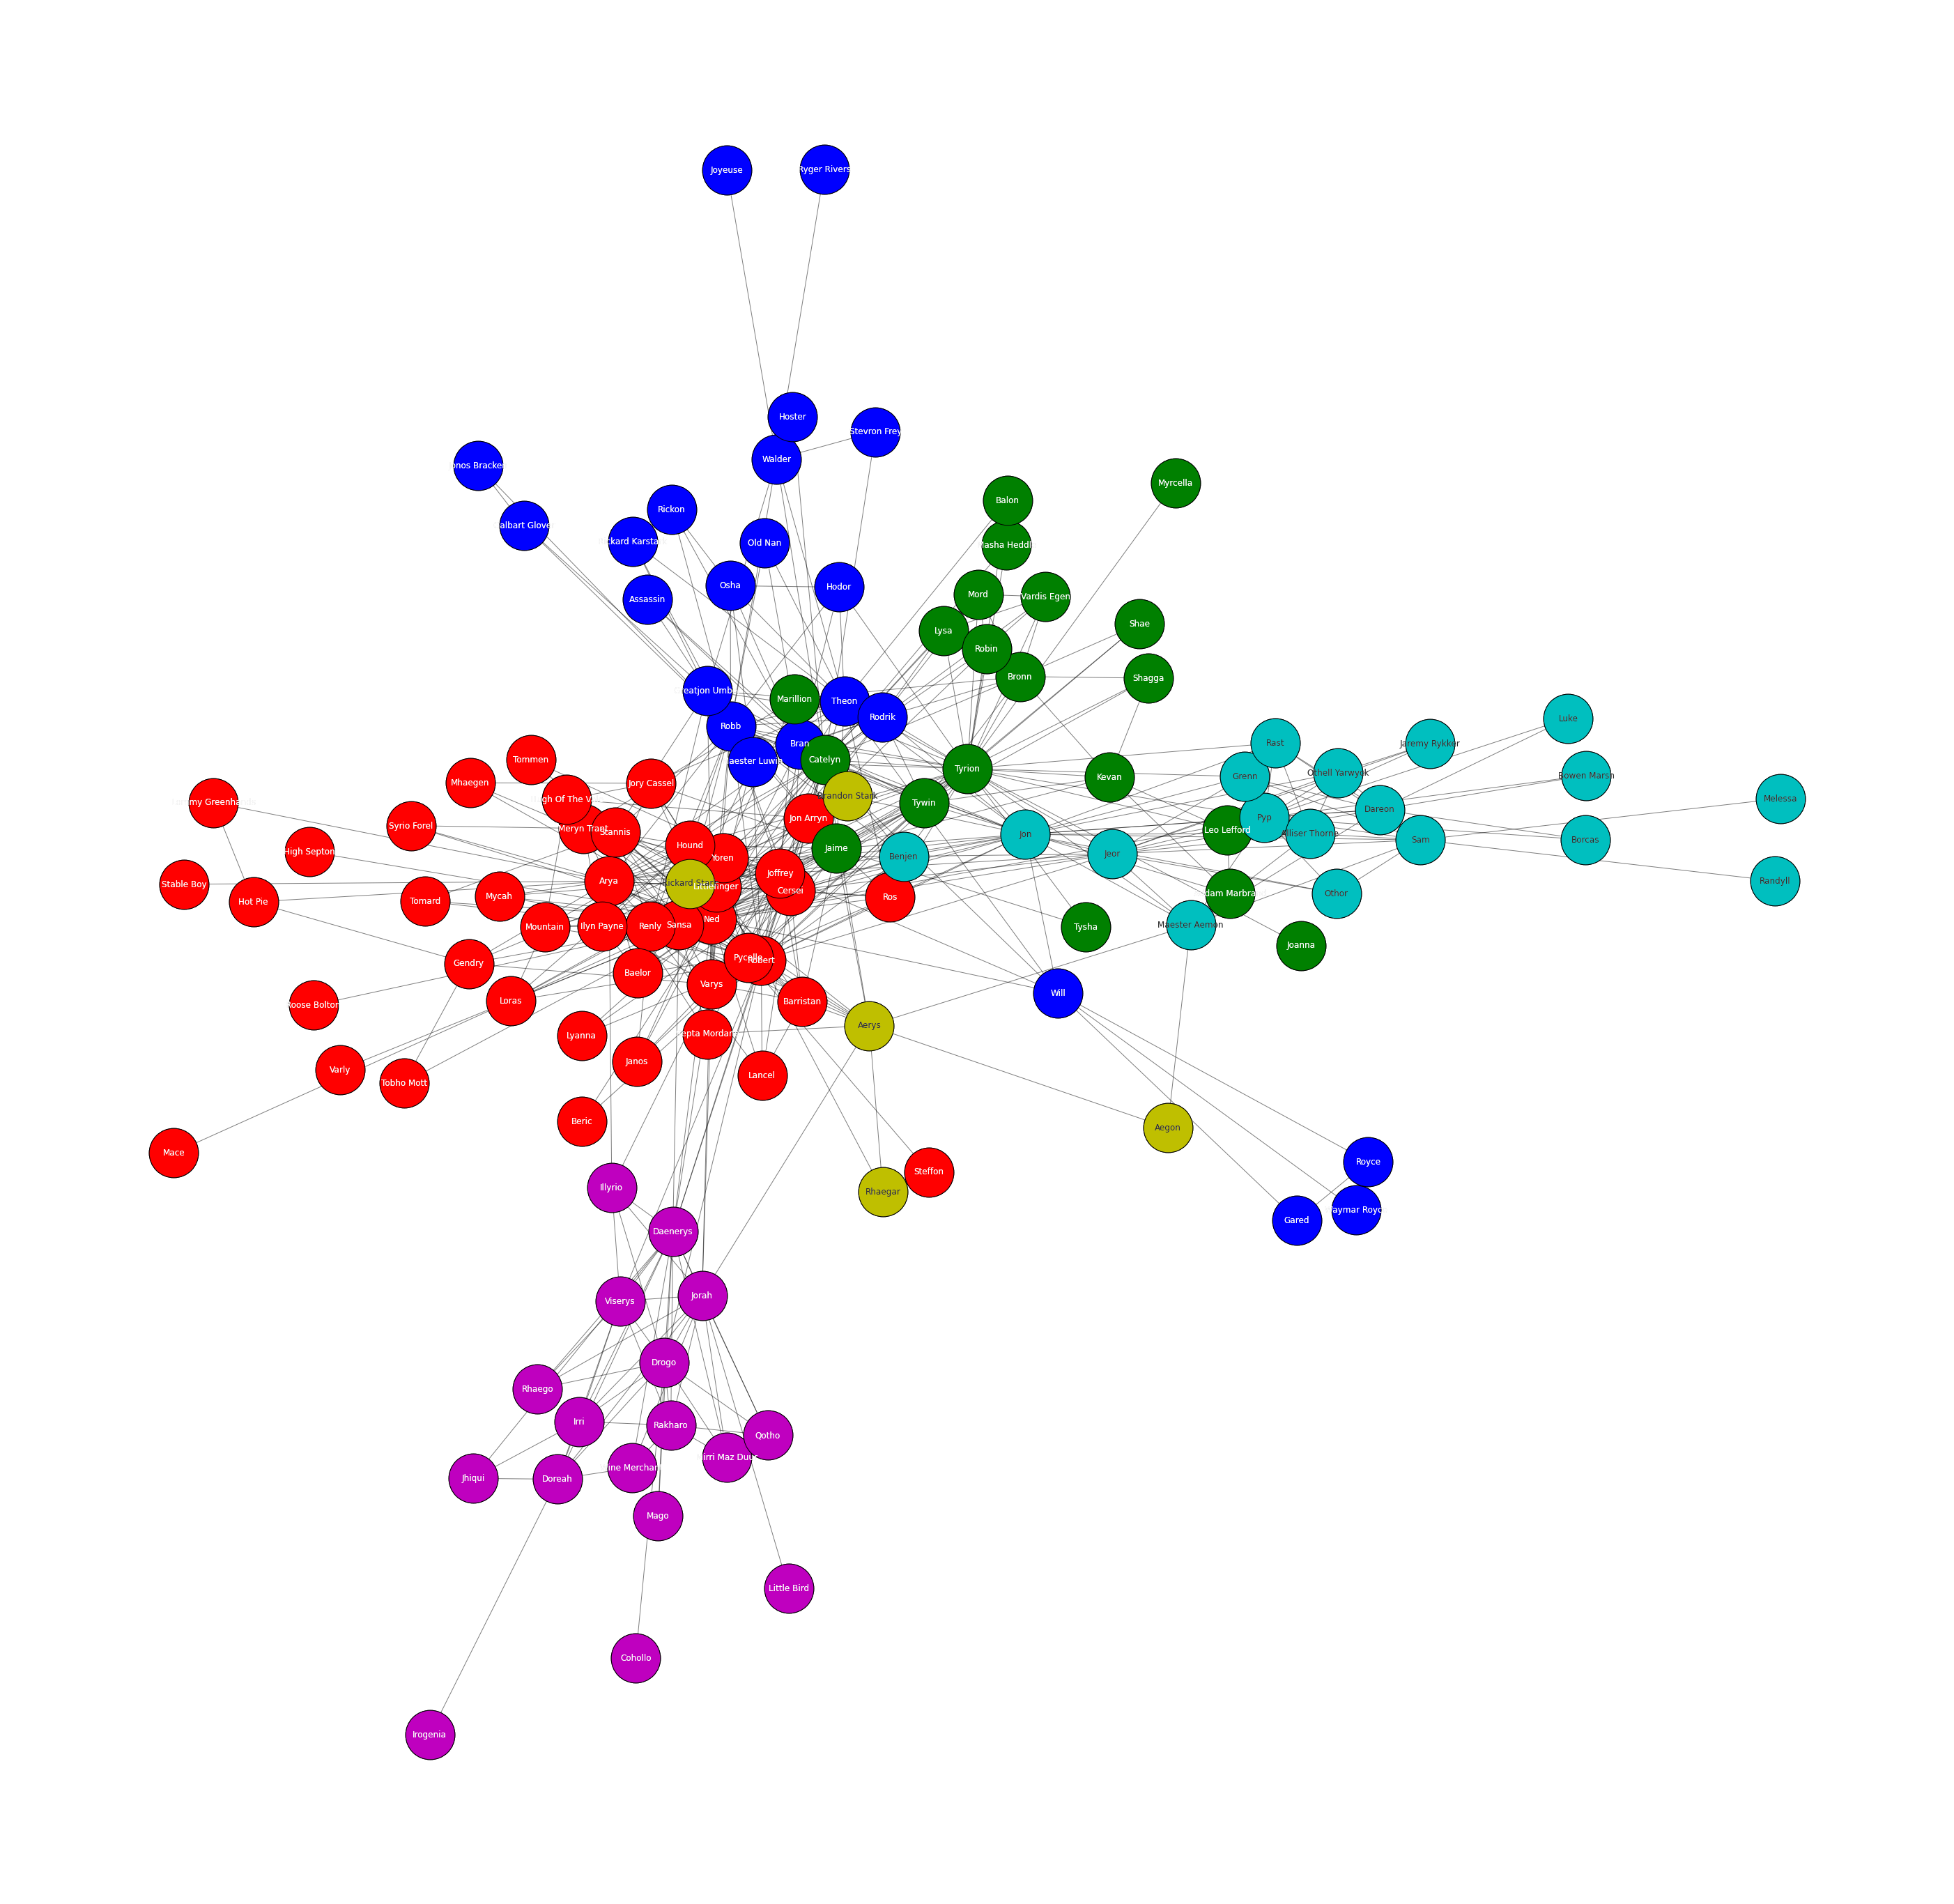

In [197]:
viz.plot_network_clusters(G, comm_infomap, pos, plot_labels=True, node_size=5e3, figsize=(50,50))
plt.show()

#### Comparison

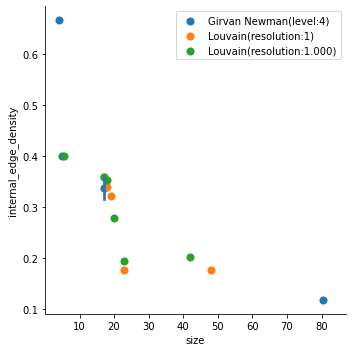

In [198]:
lmplot = viz.plot_com_properties_relation([comm_betweenness,
                                           comm_louvain,
                                           comm_infomap],
                                          evaluation.size,
                                          evaluation.internal_edge_density)
plt.show()

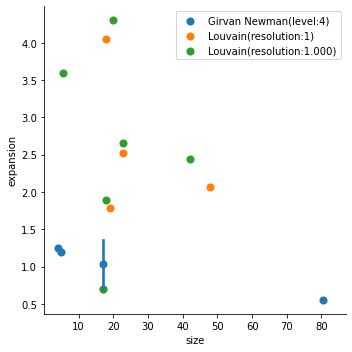

In [199]:
lmplot = viz.plot_com_properties_relation([comm_betweenness,
                                           comm_louvain,
                                           comm_infomap],
                                          evaluation.size,
                                          evaluation.expansion)
plt.show()

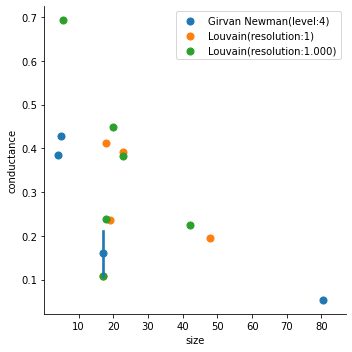

In [200]:
lmplot = viz.plot_com_properties_relation([comm_betweenness,
                                           comm_louvain,
                                           comm_infomap],
                                          evaluation.size,
                                          evaluation.conductance)
plt.show()